# Instructor Turn Activity 1
# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1

We can calculate logistic regression by adding an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Generate some data

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


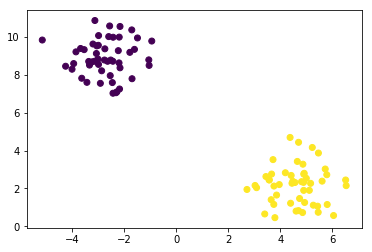

In [17]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

Split our data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Create a Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.verbose=2
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

Fit (train) or model using the training data

In [20]:
classifier.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

Validate the model using the test data

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


Make predictions

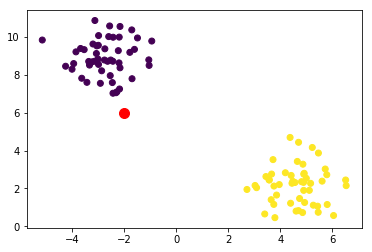

In [22]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [23]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [24]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


# Students Turn Activity 2 Voice Gender Recognition

* In this activity, you will apply logistic regression to predict the gender of a voice using acoustic properties of the voice and speech.

## Instructions

* Split your data into training and testing data.

* Create a logistic regression model with sklearn.

* Fit the model to the training data.

* Make 10 predictions and compare those to the testing data labels.

* Compute the R2 score for the training and testing data separately.




In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [26]:
voice = pd.read_csv(os.path.join('Resources', 'voice.csv'))
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [27]:
# Assign X (data) and y (target)

X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

(3168, 20) (3168,)


Split our data into training and testing

In [28]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# stratify: if not none, data is split using this as the class labels aims at split into one data set so  that ieach
# split is similar with respect to something
#For example, if vareiable y is a binary categorical variable with 0 and 1 and there are 25% zeros
# and 75% of ones, stratify = y will make sure the random split has 25% of 0 and 75% of 1

Create a Logistic Regression Model

In [29]:
# Create a logistic regression model
voicemodel = LogisticRegression()
voicemodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Fit (train) or model using the training data

In [30]:
# Fit the model to the data
voicemodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validate the model using the test data

Make predictions

In [31]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels

training_data_score = voicemodel.score(X_train,y_train)
test_data_score = voicemodel.score(X_test,y_test)

print(f"Training Data Score: {training_data_score}")
print(f"Test Data Score: {test_data_score}")

Training Data Score: 0.9103535353535354
Test Data Score: 0.9116161616161617


In [32]:
prediction = voicemodel.predict(X_test)
pd.DataFrame({"Prediction": prediction, "Actual": y_test})

,Actual,Prediction
1548,male,male
484,male,male
2714,female,female
2242,female,male
2467,female,female
686,male,male
83,male,male
2271,female,female
3166,female,male
292,male,female


# Activity 3 Instructor Turn Decision Trees 


In [33]:
from sklearn import tree
from sklearn.datasets import load_iris

# https://graphviz.gitlab.io/download/

In [34]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [35]:
# !pip install graphviz

In [36]:
# !pip install pydotplus

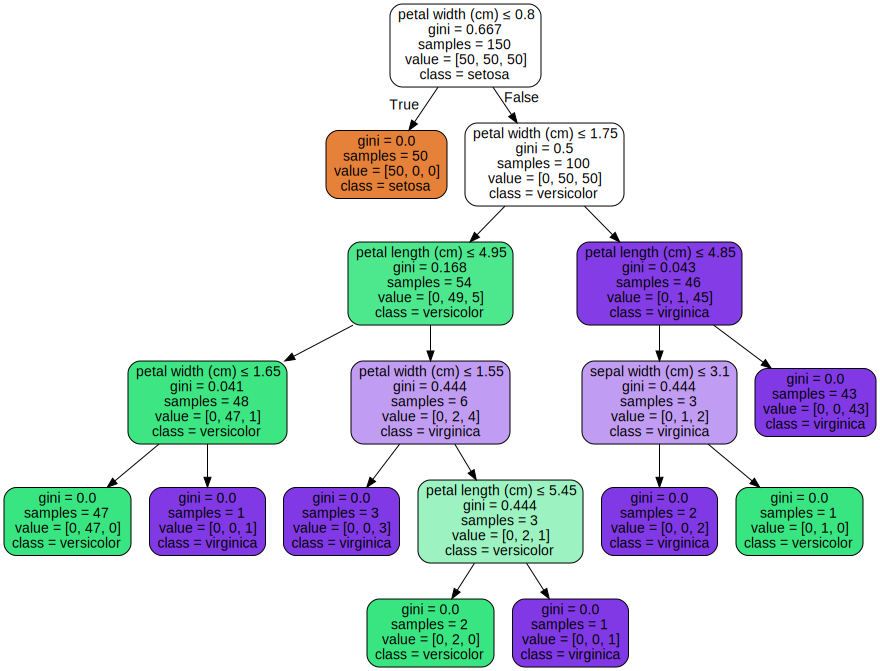

In [37]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)  
graph 

# Random_Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [39]:
# Load the Iris Dataset
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [40]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(iris.data, iris.target)
rf.score(iris.data, iris.target)

1.0

In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.09194408, 0.02685471, 0.40530019, 0.47590102])

In [42]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, iris.feature_names), reverse=True)

[(0.475901018001435, 'petal width (cm)'),
 (0.40530018834257264, 'petal length (cm)'),
 (0.0919440821446883, 'sepal length (cm)'),
 (0.026854711511303805, 'sepal width (cm)')]

# Students Turn Activity 4 Trees

* In this activity, you will compare the performance of a decision tree to a random forest classifier using the Pima Diabetes DataSet.

## Instructions

* Use the Pima Diabetes DataSet and train a decision tree classifier to predict the diabetes label (positive or negative). Print the score for the trained model using the test data.

* Repeat the exercise using a Random Forest Classifier with SciKit-Learn. You will need to investigate the SciKit-Learn documentation to determine how to build and train this model.

* Experiment with different numbers of estimators in your random forest model. Try different values between 100 and 1000 and compare the scores.




In [43]:
from sklearn import tree
import pandas as pd
import os

In [44]:
df = pd.read_csv(os.path.join("Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
target = df["Outcome"]
target_names = ["negative", "positive"]

In [46]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, random_state=42)

In [55]:
# Create a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6927083333333334

In [56]:
# Fit the classifier to the data
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.71875

In [57]:
# Calculate the R2 score for the test data
sorted(zip(rf.feature_importances_,feature_names),reverse=True)

[(0.2685970394033965, 'Glucose'),
 (0.15355039619750468, 'BMI'),
 (0.14777365289570885, 'Age'),
 (0.12211832331176468, 'DiabetesPedigreeFunction'),
 (0.08575443299012458, 'BloodPressure'),
 (0.07822148891149068, 'Pregnancies'),
 (0.07242545721562486, 'Insulin'),
 (0.07155920907438496, 'SkinThickness')]

In [ ]:
# Bonus
# Create, fit, and score a Random Forest Classifier
# YOUR CODE HERE

# Instructor Turn Activity 5 KNN

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [59]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [60]:
X = iris.data
y = iris.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [62]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [63]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.947
k: 3, Train/Test Score: 0.955/0.974
k: 5, Train/Test Score: 0.973/0.974
k: 7, Train/Test Score: 0.973/0.947
k: 9, Train/Test Score: 0.973/0.974
k: 11, Train/Test Score: 0.973/0.974
k: 13, Train/Test Score: 0.982/0.947
k: 15, Train/Test Score: 0.982/0.947
k: 17, Train/Test Score: 0.982/0.947
k: 19, Train/Test Score: 0.982/0.947


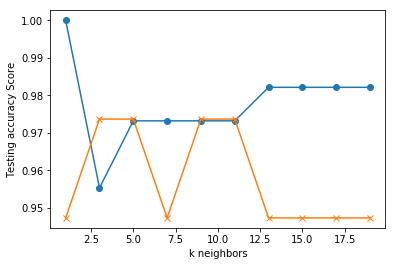

In [64]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

In [ ]:
new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

# Students Activity 6 Turn KNN

* In this activity, you will determine the best `k` value in KNN to predict diabetes for the Pima Diabetes DataSet.

## Instructions

* Calculate the Train and Test scores for `k` ranging from 1 to 20. Use only odd numbers for the k values.

* Plot the `k` values for both the train and test data to determine where the best combination of scores occur. This point will be the optimal `k` value for your model.

* Re-train your model using the `k` value that you found to have the best scores. Print the score for this value.

- - -

In [77]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [78]:
df = pd.read_csv(os.path.join("Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
target = df["Outcome"]
target_names = ["negative", "positive"]

In [80]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.847/0.641
k: 5, Train/Test Score: 0.807/0.656
k: 7, Train/Test Score: 0.799/0.682
k: 9, Train/Test Score: 0.797/0.714
k: 11, Train/Test Score: 0.795/0.693
k: 13, Train/Test Score: 0.790/0.740
k: 15, Train/Test Score: 0.786/0.740
k: 17, Train/Test Score: 0.786/0.714
k: 19, Train/Test Score: 0.781/0.714


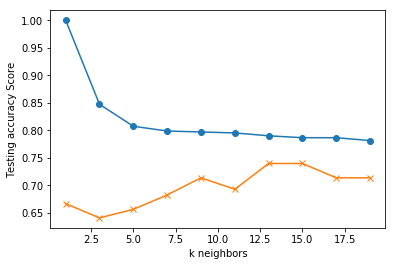

In [83]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [97]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.740


# Instructor Turn Activity 7 SVM Support Vector Machine

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

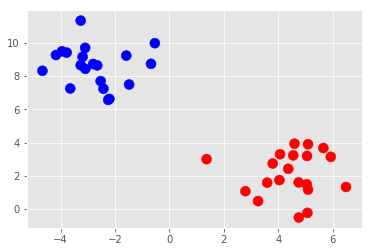

In [99]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [100]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

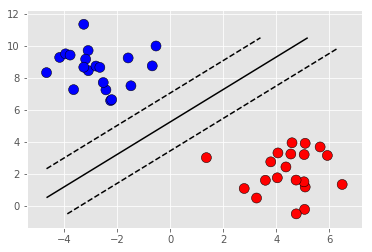

In [101]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

# Validation

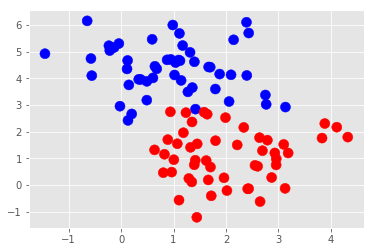

In [102]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [103]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

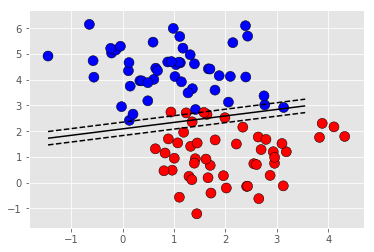

In [105]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [106]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.83      1.00      0.91        10
        red       1.00      0.87      0.93        15

avg / total       0.93      0.92      0.92        25



# Students Turn Activity 8 Turn 
# SVM

* In this activity, apply a support vector machine classifier predict diabetes for the Pima Diabetes DataSet.

## Instructions

* Import a support vector machine linear classifier and fit the model to the data.

* Compute the classification report for this model using the test data.

- - -

In [154]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [155]:
df = pd.read_csv(os.path.join( "Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
target = df["Outcome"]
target_names = ["negative", "positive"]
target.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [157]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=15)

In [159]:
# Create a support vector machine linear classifer and fit it to the training data
model_diabetes = SVC(kernel='linear')
model_diabetes.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [160]:
# Print the model score using the test data
model_diabetes.score(X_test,y_test)

0.7447916666666666

In [164]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model_diabetes.predict(X_test)
print(classification_report(y_test, predictions,target_names=target_names))

             precision    recall  f1-score   support

   negative       0.79      0.85      0.82       129
   positive       0.63      0.52      0.57        63

avg / total       0.74      0.74      0.74       192



# Instructor Activity 9 GridSearch

In [165]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

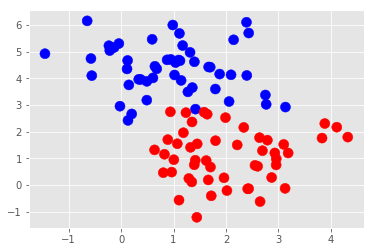

In [166]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [167]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [168]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
# C parameter adjusts soft margin while gama affects variance.
grid = GridSearchCV(model, param_grid, verbose=3)

In [170]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.8846153846153846, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .................... C=1, gamma=0.0001, score=0.84, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.9583333333333334, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.8846153846153846, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .................... C=1, gamma=0.0005, score=0.84, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9583333333333334, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [171]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [172]:
# List the best score
print(grid.best_score_)

0.9066666666666666


In [173]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [174]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.83      1.00      0.91        10
        red       1.00      0.87      0.93        15

avg / total       0.93      0.92      0.92        25



# Students Turn Activity 10 
# Grid Search and Hyper-Parameter Tuning

* In this activity, you will revisit the SVM activity for the Pima Diabetes DataSet and apply `GridSearchCV` to tune the model parameters.

## Instructions

* Use the starter code provided and apply `GridSearchCV` to the model. Change the `C` and `gamma` parameters.

* For `C`, use the following list of settings: `[1, 5, 10]`.

* For `gamma`, use the following list of settings: `[0.0001, 0.001, 0.01]`.

* Print the best parameters and best score for the tuned model.

* Calculate predictions using the `X_test` data and print the classification report.




In [175]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [176]:
df = pd.read_csv(os.path.join( "Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [177]:
target = df["Outcome"]
target_names = ["negative", "positive"]

In [178]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [180]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [181]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [182]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.8082901554404145, total=   2.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7552083333333334, total=   1.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7591623036649214, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8082901554404145, total=   3.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7552083333333334, total=   1.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7591623036649214, total=   1.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8082901554404145, total=   2.9s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7552083333333334, total=   1.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7591623036649214, total=   1.1s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [183]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [184]:
# List the best score
print(grid.best_score_)

0.7743055555555556


In [185]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [186]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.79      0.78      0.79       123
        red       0.62      0.64      0.63        69

avg / total       0.73      0.73      0.73       192

